# Autoregressive (AR) Models

A Summary of lecture "Time Series Analysis in Python"

sources:
* Chanseok Kang, Jun 8, 2020,
<https://goodboychan.github.io/python/datacamp/time_series_analysis/2020/06/08/01-Autoregressive-Models.html>
* rp

In [1]:
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['figure.figsize'] = (10, 5)

/home/rp/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Describe AR Model

-   Mathematical Description of AR(1) Model    
    $R_{t} = \mu + \phi R_{t - 1} + \epsilon_{t}$

    - $R_t$: data value at time $t$
    - $\mu$: mean value (typically 0)
    - $\epsilon$: (random) noise
    - AR paramter $\phi$; For stationary, $- 1 < \phi < 1$   
    &nbsp;
-   Interpretation of AR(1) Parameter
    - Since only one lagged value or right hand side, this is called,  AR model of order 1 or, AR(1) model  
      &nbsp;
-   High order AR Models:
    - AR(1): $R_{t} = \mu + \phi_{1}R_{t - 1} + \epsilon_{t}$
    - AR(2): $R_{t} = \mu + \phi_{1}R_{t - 1} + \phi_{2}R_{t - 2} + \epsilon_{t}$
    - AR(3): $R_{t} = \mu + \phi_{1}R_{t - 1} + \phi_{2}R_{t - 2} + \phi_{3}R_{t - 3} + \epsilon_{t}$



### Simulate AR(1) Time Series

You will simulate and plot a few AR(1) time series, each with a
different parameter, $\phi$, using the `arima_process` module in
statsmodels. In this exercise, you will look at an AR(1) model with a
large positive $\phi$ and a large negative $\phi$, but feel free to play
around with your own parameters.

There are a few conventions when using the arima_process module that
require some explanation. First, these routines were made very generally
to handle both AR and MA models. We will cover MA models next, so for
now, just ignore the MA part: set MA parameter to lag 1: `[1]` (see code).

Second, when inputting the coefficients,
you must include the zero-lag coefficient of 1, and the sign of the
other coefficients is opposite what we have been using (to be consistent
with the time series literature in signal processing). For example, for
an AR(1) process with $\phi$ =0.9, the array representing the AR
parameters would be `ar = np.array([1, -0.9])`

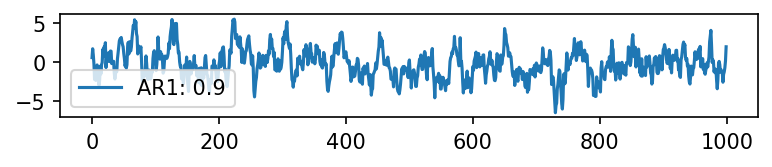

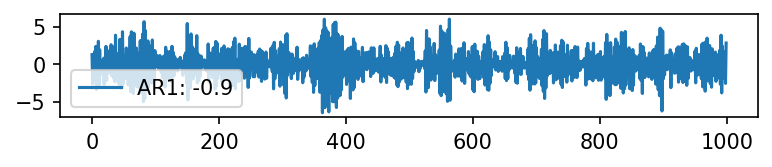

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess

nsample = 1000

# Plot 1: AR parameter = +0.9

plt.figure(figsize=(6,2), dpi=150)
plt.subplot(2, 1, 1)
# first parameter (always) 1:
ar1 = np.array([1, -0.9])
# first parameter (always) 1. In AR model the only paramter for MA
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=nsample)
plt.plot(simulated_data_1, label = "AR1: 0.9");
plt.legend()
plt.show()

# Plot 2: AR parameter = -0.9

plt.figure(figsize=(6,2), dpi=150)
plt.subplot(2, 1, 2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=nsample)
plt.plot(simulated_data_2, label="AR1: -0.9");
plt.legend()
plt.show()

### Compare the ACF for Several AR Time Series

The autocorrelation function decays exponentially for an AR time series
at a rate of the AR parameter. For example, if the AR parameter,
$\phi = + 0.9$, the first-lag autocorrelation will be $0.9$, the
second-lag will be $(0.9)^{2} = 0.81$, the third-lag will be
$(0.9)^{3} = 0.729$, etc. A smaller AR parameter will have a steeper
decay, and for a negative AR parameter, say $- 0.9$, the decay will flip
signs, so the first-lag autocorrelation will be $- 0.9$, the second-lag
will be $(\text{−}0.9)^{2} = 0.81$, the third-lag will be
$(\text{−}0.9)^{3} = \text{−}0.729$, etc.

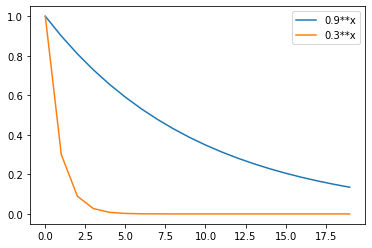

In [3]:
x = np.arange(0, 20)
y1 = 0.9**x
y2 = 0.3**x
plt.plot(x,y1, label="0.9**x")
plt.plot(x,y2, label="0.3**x")
plt.legend()
plt.show()

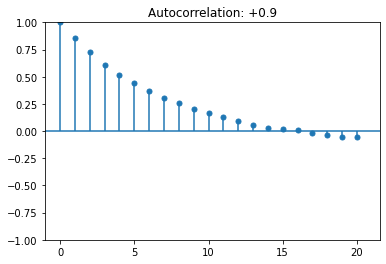

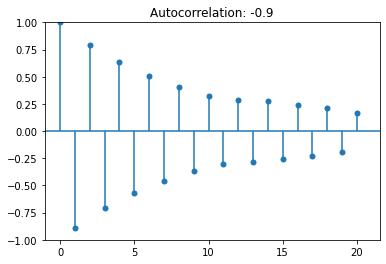

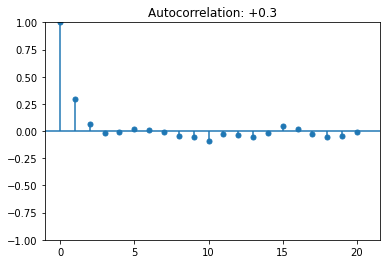

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

#nsample=1000

# AR parameter = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=nsample)

# Plot 1: AR parameter = +0.9
ax = plot_acf(simulated_data_1, alpha=1, lags=20, title='Autocorrelation: +0.9');

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20, title='Autocorrelation: -0.9');

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20, title='Autocorrelation: +0.3');

## Estimating and Forecasting AR Model

### Estimating an AR Model

We will estimate the AR(1) parameter, $\phi$, of one of the simulated
series that we generated above. Since the parameters
are known for a simulated series, it is a good way to understand the
estimation routines before applying it to real data.

In [5]:
from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(simulated_data_1, order=(1, 0, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

print("="*20, "\n")

# Print out the estimate for the constant and for phi
print("Summary:")

print(res.params)
print('ie "ar.L1": ', res.params[1])
print('expected: ', ar1[1])
print("_"*80, "\n")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1388.168
Date:                Sat, 24 Feb 2024   AIC                           2782.335
Time:                        11:01:01   BIC                           2797.058
Sample:                             0   HQIC                          2787.931
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2000      0.214     -0.935      0.350      -0.619       0.219
ar.L1          0.8568      0.016     54.790      0.000       0.826       0.887
sigma2         0.9391      0.043     22.006      0.0

&nbsp;

Confirm coefficients by Yule Walker:

In [6]:
from statsmodels.regression.linear_model import yule_walker

coeff, sigma = yule_walker(simulated_data_1, order = 1)
print("(simga: ", sigma, ")")
print("Yule-Walkter: ", coeff)

(simga:  0.9684113964249075 )
Yule-Walkter:  [0.85719802]


&nbsp;

Now test a model AR(2) of order 2:

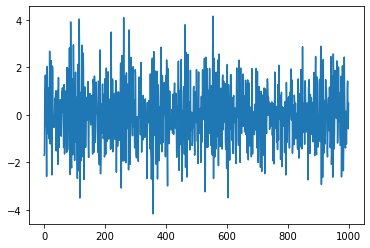

In [7]:
ar32 = np.array([1, -0.3, 0.6])
ma32 = np.array([1])
AR_object32 = ArmaProcess(ar32, ma32)
simulated_data_32 = AR_object32.generate_sample(nsample=nsample)

plt.plot(simulated_data_32)
plt.show()

In [8]:
#from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(simulated_data_32, order=(2, 0, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

print("="*20, "\n")

# Print out the estimate for the constant and for phi
print("Summary:")

print('Compare p1 and p2, ie second and third value in list:')
print(f'Input simulation: {ar32} (remember: sign reversed)')
print(res.params)

print("_"*80, "\n")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1418.869
Date:                Sat, 24 Feb 2024   AIC                           2845.738
Time:                        11:01:01   BIC                           2865.369
Sample:                             0   HQIC                          2853.199
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.025      0.053      0.958      -0.048       0.050
ar.L1          0.3324      0.025     13.080      0.000       0.283       0.382
ar.L2         -0.5986      0.024    -24.436      0.0

<!--
                ARMA Model Results                              
        ==============================================================================
        Dep. Variable:                      y   No. Observations:                 1000
        Model:                     ARMA(1, 0)   Log Likelihood               -1398.596
        Method:                       css-mle   S.D. of innovations              0.979
        Date:                Mon, 08 Jun 2020   AIC                           2803.192
        Time:                        11:48:11   BIC                           2817.915
        Sample:                             0   HQIC                          2808.788
                                                                                      
        ==============================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
        ------------------------------------------------------------------------------
        const          0.7849      0.300      2.618      0.009       0.197       1.372
        ar.L1.y        0.8976      0.014     64.878      0.000       0.871       0.925
                                            Roots                                    
        =============================================================================
                          Real          Imaginary           Modulus         Frequency
        -----------------------------------------------------------------------------
        AR.1            1.1141           +0.0000j            1.1141            0.0000
        -----------------------------------------------------------------------------
        When the true phi=0.9, the estimate of phi (and the constant) are:
        [0.78487563 0.89762208]
        
-->

### Forecasting with an AR Model

In addition to estimating the parameters of a model that you did in the
last exercise, you can also do forecasting, both in-sample and
out-of-sample using statsmodels. The in-sample is a forecast of the next
data point using the data up to that point, and the out-of-sample
forecasts any number of data points in the future. These forecasts can
be made using either the `predict()` method if you want the forecasts in
the form of a series of data, or using the `plot_predict()` method if
you want a plot of the forecasted data. You supply the starting point
for forecasting and the ending point, which can be any number of data
points after the data set ends.

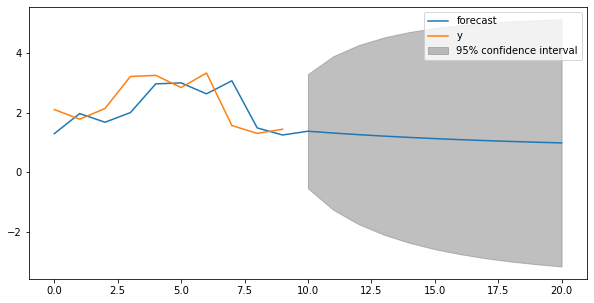

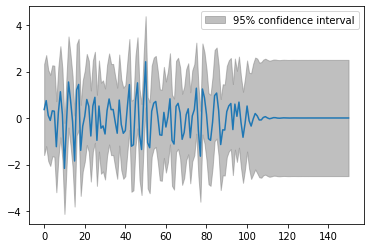

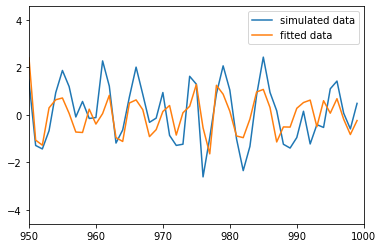

In [9]:
# Plot AR(2)

from statsmodels.graphics.tsaplots import plot_predict

mod = ARIMA(simulated_data_32, order=(2, 0,0))
res = mod.fit()
#plt.plot(res.predict(start=990, end=1010))
plot_predict(res, start= 900, end = 1050)
plt.show()
#predict(res, start=990, end=1100)

plt.plot(simulated_data_32, label = 'simulated data')
plt.plot(res.predict(), label = 'fitted data')
plt.xlim(950,1000)
#plt.xlim(0, 100)
plt.legend()
plt.show()



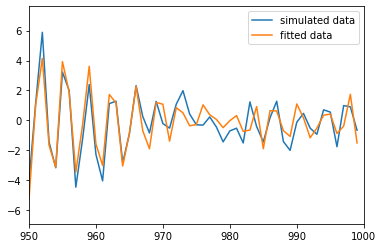

[ 0.00557193  0.31509835 -0.58879179  0.69219488  0.90341036]


In [10]:
# AR(3)

ar33 = np.array([1, -0.3, 0.6, -0.7])
ma33 = np.array([1])
AR_object33 = ArmaProcess(ar33, ma33)
simulated_data_33 = AR_object33.generate_sample(nsample=nsample)


#mod = ARIMA(simulated_data_33, order=(5, 0,0))
mod = ARIMA(simulated_data_33, order=(3, 0,0))
res = mod.fit()

plt.plot(simulated_data_33, label = 'simulated data')
plt.plot(res.predict(), label = 'fitted data')
plt.xlim(950,1000)
#plt.xlim(0, 100)
plt.legend()
plt.show()

print(res.params)

### Let's Forecast Interest Rates

You will now use the forecasting techniques you learned in the last
exercise and apply it to real data rather than simulated data. You will
revisit a dataset from the first chapter: the annual data of 10-year
interest rates going back 56 years, which is in a Series called
`interest_rate_data`. Being able to forecast interest rates is of
enormous importance, not only for bond investors but also for
individuals like new homeowners who must decide between fixed and
floating rate mortgages.

You saw in the first chapter that there is some mean reversion in
interest rates over long horizons. In other words, when interest rates
are high, they tend to drop and when they are low, they tend to rise
over time. Currently they are below long-term rates, so they are
expected to rise, but an AR model attempts to quantify how much they are
expected to rise.

In [11]:
fn = 'data/5_stocks.csv'
#bonds = pd.read_csv('./dataset/daily_rates.csv', index_col=0)
bonds = pd.read_csv(fn, index_col=0).iloc[:,0]

bonds.index = pd.to_datetime(bonds.index, format="%Y-%m-%d")
bonds.head()

Date
2001-07-05    1.66
2001-07-06    1.57
2001-07-09    1.62
2001-07-10    1.51
2001-07-11    1.61
Name: AAPL, dtype: float64

<!--                   US10Y
      ------------ -------
      DATE         
      1962-01-02   4.06
      1962-01-03   4.03
      1962-01-04   3.99
      1962-01-05   4.02
      1962-01-08   4.03
..>

In [12]:
    interest_rate_data = bonds.resample(rule='A').last()
    interest_rate_data.head()

Date
2001-12-31     1.56
2002-12-31     1.02
2003-12-31     1.53
2004-12-31     4.60
2005-12-31    10.27
Freq: A-DEC, Name: AAPL, dtype: float64

<!--
                   US10Y
      ------------ -------
      DATE         
      1962-12-31   3.85
      1963-12-31   4.14
      1964-12-31   4.21
      1965-12-31   4.65
      1966-12-31   4.64
-->

In [13]:
    mod = ARIMA(interest_rate_data, order=(1, 0, 0))
    res = mod.fit()

    # Plot the original series and the forecasted series
    #res.plot_predict(start=0, end='2022');
    #plt.legend(fontsize=8);
    #plt.savefig('../images/arma_forecast.png')

/home/rp/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [14]:
# Warning: Non-stationary starting autoregressive parameters found. 
# try: order = (1,1,0)

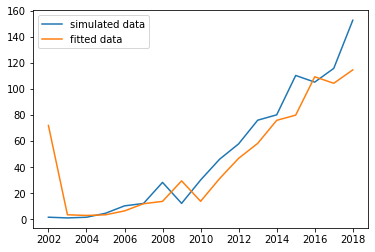

In [15]:
plt.plot(interest_rate_data, label = 'simulated data')
plt.plot(res.predict(), label = 'fitted data')
plt.legend()
plt.show()

### Compare AR Model with Random Walk

Sometimes it is difficult to distinguish between a time series that is
slightly mean reverting and a time series that does not mean revert at
all, like a random walk. You will compare the ACF for the slightly
mean-reverting interest rate series of the last exercise with a
simulated random walk with the same number of observations.

In [16]:
    simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
           6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
           5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
           5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
           5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
           3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
           4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
           3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
           3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
           2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
           3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
           3.37204482])

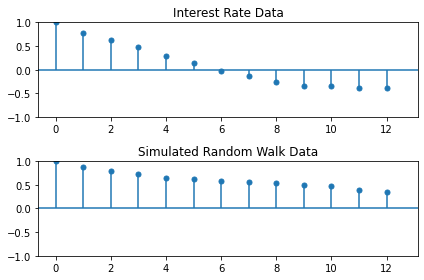

In [17]:
    fig, axes = plt.subplots(2, 1)

    # Plot the autocorrelation of the interest rate series in the top plot
    fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0]);

    # Plot the autocorrelation of the simulated random walk series in the bottom plot
    fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1]);

    # Label axes
    axes[0].set_title("Interest Rate Data");
    axes[1].set_title("Simulated Random Walk Data");

    plt.tight_layout()

## Choosing the Right Model

-   Identifying the Order of an AR Model

    -   The order of an AR(p) model will usually be unknown
    -   Two techniques to determine order
        -   Partial Autocorrelation Funciton
        -   Information criteria

-   Partial Autocorrelation Function (PACF) $$\begin{matrix}
    R_{t} & {= \phi_{0,1} + {\phi_{1,1}R_{t - 1} + \epsilon_{1t}}} \\
    R_{t} & {= \phi_{0,2} + \phi_{1,2}R_{t - 1} + {\phi_{2,2}R_{t - 2} + \epsilon_{2t}}} \\
    R_{t} & {= \phi_{0,3} + \phi_{1,3}R_{t - 1} + \phi_{2,3}R_{t - 2} + {\phi_{3,3}R_{t - 3} + \epsilon_{3t}}} \\
    R_{t} & {= \phi_{0,4} + \phi_{1,4}R_{t - 1} + \phi_{2,4}R_{t - 2} + \phi_{3,4}R_{t - 3} + {\phi_{4,4}R_{t - 4} + \epsilon_{4t}}} \\
    \end{matrix}
    $$

-   Information Criteria

    -   Information criteria: adjusts goodness-of-fit for number of
        parameters
    -   Two popular adjusted goodness-of-fit measures
        -   AIC ([Akaike Information
            Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion))
        -   BIC ([Bayesian Information
            Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion))

### Estimate Order of Model: PACF

One useful tool to identify the order of an AR model is to look at the
Partial Autocorrelation Function (PACF). In this exercise, you will
simulate two time series, an AR(1) and an AR(2), and calculate the
sample PACF for each. You will notice that for an AR(1), the PACF should
have a significant lag-1 value, and roughly zeros after that. And for an
AR(2), the sample PACF should have significant lag-1 and lag-2 values,
and zeros after that.

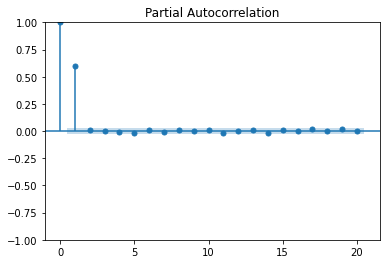

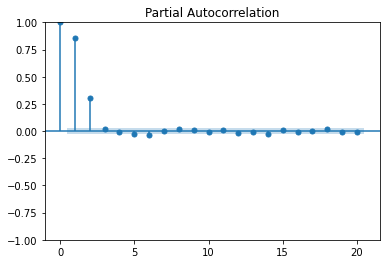

In [18]:
    from statsmodels.graphics.tsaplots import plot_pacf

    # Simulate AR(1) with phi=+0.6
    ma = np.array([1])
    ar = np.array([1, -0.6])
    AR_object = ArmaProcess(ar, ma)
    simulated_data_1 = AR_object.generate_sample(nsample=5000)

    # Plot PACF for AR(1)
    plot_pacf(simulated_data_1, lags=20, method='ywm');

    # simulated AR(2) with phi1=+0.6, phi2=+0.3
    ma = np.array([1])
    ar = np.array([1, -0.6, -0.3])
    AR_object = ArmaProcess(ar, ma)
    simulated_data_2 = AR_object.generate_sample(nsample=5000)

    # Plot PACF for AR(2)
    plot_pacf(simulated_data_2, lags=20, method='ywm');

### Estimate Order of Model: Information Criteria

Another tool to identify the order of a model is to look at the Akaike
Information Criterion (AIC) and the Bayesian Information Criterion
(BIC). These measures compute the goodness of fit with the estimated
parameters, but apply a penalty function on the number of parameters in
the model. You will take the AR(2) simulated data from the last
exercise, saved as simulated_data_2, and compute the BIC as you vary the
order, p, in an AR(p) from 0 to 6.

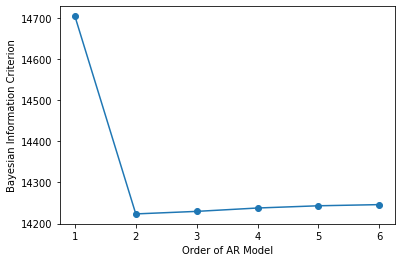

In [19]:
    BIC = np.zeros(7)

    for p in range(7):
        #mod = ARIMA(simulated_data_33, order=(p, 0, 0))
        mod = ARIMA(simulated_data_2, order=(p, 0, 0))
        res = mod.fit()
        # Save BIC for AR(p)
        BIC[p] = res.bic
        
    # Plot the BIC as a function of p
    plt.plot(range(1, 7), BIC[1:7], marker='o');
    plt.xlabel('Order of AR Model');
    plt.ylabel('Bayesian Information Criterion');

## SARIMA

ARIMA erfasst Level und Trend, aber keine Saisonalität. Das erinnert an die zweifache exponentielle Glättung.

Einer ähnlichen Idee wie bei der dreifachen exponentiellen Glättung folgend, erhält ARIMA eine Saisonalität, indem ein weiteres ARIMA-Modell mit einer fest vorgegebenen Periode hinzugefügt wird.

Die Schreibweise:  
* ARIMA: pdq
* SARIMA: (pdq)(PDQS)

Statt drei Parametern für die Ordnung (AR, I, MA) verfügt SARIMA über sechs Parameter. Die Saisonalität ist strenggenommen kein Parameter, da sie fest vorgegeben wird.